Shape of y :  (70000,)
Shape of X :  (70000, 784)
y to_numeric :  [5 0 4 ... 4 5 6]
n_classes : 10
LogisticRegressionCustomSoftmax score : 
acc 0.903
recall 0.8988104711657042
precision 0.9005271085440534
F1 0.8988319612146667
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.92      0.94      0.93       108
           2       0.93      0.80      0.86        93
           3       0.90      0.94      0.92       115
           4       0.86      0.94      0.90        88
           5       0.85      0.84      0.84        80
           6       0.94      0.95      0.95       107
           7       0.89      0.91      0.90       101
           8       0.87      0.83      0.85        89
           9       0.89      0.87      0.88       106

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000

[[109   0   0 

/Users/huangxiuzhen/.pyenv/versions/colorado_data_scienst/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


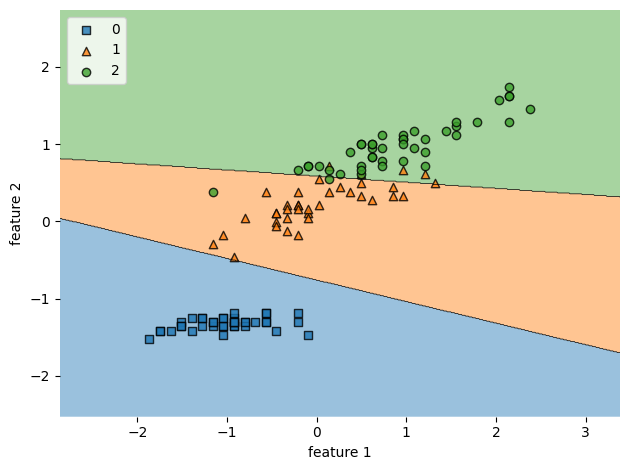

[[7.99542177e-04 2.07761809e-01 7.91438649e-01]
 [1.74888237e-02 7.11137724e-01 2.71373452e-01]
 [8.68631742e-01 1.31220880e-01 1.47378258e-04]
 [6.34817590e-07 1.06001826e-02 9.89399183e-01]
 [9.10540091e-01 8.93579274e-02 1.01981324e-04]
 [1.09714583e-05 2.97131594e-02 9.70275869e-01]
 [9.37213193e-01 6.27403631e-02 4.64434206e-05]
 [8.16754708e-04 3.02885087e-01 6.96298158e-01]
 [4.94919896e-04 2.51688303e-01 7.47816777e-01]
 [1.53026936e-02 7.04758279e-01 2.79939027e-01]
 [7.44077510e-05 7.30959850e-02 9.26829607e-01]
 [2.46726090e-03 4.29574393e-01 5.67958346e-01]
 [2.02349179e-03 3.55477879e-01 6.42498629e-01]
 [1.54378153e-03 3.68596345e-01 6.29859874e-01]
 [2.02349179e-03 3.55477879e-01 6.42498629e-01]
 [9.33160699e-01 6.67803328e-02 5.89686686e-05]
 [4.42537802e-03 4.68227528e-01 5.27347094e-01]
 [1.20932256e-02 5.67009204e-01 4.20897570e-01]
 [9.40522796e-01 5.94267911e-02 5.04133319e-05]
 [9.00693096e-01 9.92206821e-02 8.62219551e-05]
 [2.20124310e-03 3.04164551e-01 6.936342

np.float64(0.7333333333333333)

In [2]:
import math
import pickle
import gzip
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pylab as plt

from math import exp
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

class SPAM_import:
    """
    sets up SPAM dataset from OpenML 
    """
    def __init__(self):
        
        df = pd.read_csv("data/spamdata.csv", sep=' ') 
        
        # Create arrays for the features and the response variable
        # store for use later 
        df_shuffled = df.sample(frac = 1, random_state = 42).reset_index(drop = True)
        feature_name = df_shuffled.columns.tolist()
        y = df_shuffled['isSPAM'].values
        X = df_shuffled.drop('isSPAM', axis=1).values 

        # check row count and column count 
        print("Shape of y : ", y.shape) # Shape of y :  (70000,)
        print("Shape of X : ", X.shape) # Shape of X :  (70000, 784)

        # Convert the labels to numeric labels
        # is a function in the pandas library designed to convert an argument 
        # (such as a Series, list, or 1-d array) to a numeric type. 
        # It is particularly useful when dealing with data that may contain non-numeric values 
        # or values stored as strings that should be treated as numbers.
        y = np.array(pd.to_numeric(y))
        print("y to_numeric : ", y)

        test_split = 0.1
        train_size = int((1 - test_split) * len(df_shuffled))

        # avoid RuntimeWarning: overflow encountered in exp return 1 / (1 + np.exp(-z))
        # 特徵標準化（Standardization）
        # 若輸入 x_train 的值本身就非常大（例如原始 pixel 值、金錢、次方），會造成 𝑧=𝑤⋅𝑥+𝑏 z=w⋅x+b 絕對值變得很大
        # 使用 Z-score 標準化（均值為 0，標準差為 1）
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(X)

        # create training and validation sets 
        self.train_x, self.train_y = x_scaled[:train_size,:], y[:train_size]
        self.val_x, self.val_y = x_scaled[train_size:,:], y[train_size:]

class MNIST_import:
    """
    sets up MNIST dataset from OpenML 
    """
    def __init__(self):
        
        df = pd.read_csv("data/mnist_784.csv") # this is a 28*28 picture data set
        
        # Create arrays for the features and the response variable
        # store for use later 
        y = df['class'].values
        X = df.drop('class', axis=1).values # axis is an enum, 0: row, 1: column
        
        # check row count and column count 
        print("Shape of y : ", y.shape) # Shape of y :  (70000,)
        print("Shape of X : ", X.shape) # Shape of X :  (70000, 784)

        # Convert the labels to numeric labels
        # is a function in the pandas library designed to convert an argument 
        # (such as a Series, list, or 1-d array) to a numeric type. 
        # It is particularly useful when dealing with data that may contain non-numeric values 
        # or values stored as strings that should be treated as numbers.
        y = np.array(pd.to_numeric(y))
        print("y to_numeric : ", y)

        # avoid overflow
        scaler = StandardScaler()
        x_scaled = scaler.fit_transform(X)

        # create training and validation sets 
        self.train_x, self.train_y = x_scaled[:5000,:], y[:5000]
        self.val_x, self.val_y = x_scaled[5000:6000,:], y[5000:6000]

class IRIS_import: 
    def __init__(self):
        iris = datasets.load_iris()
        # print(type(iris)) # <class 'sklearn.utils._bunch.Bunch'>

        # check data type
        # self.train_x = iris.data[:, [0, 2]]
        # self.train_y = iris.target
        # print(type(self.train_x)) # <class 'numpy.ndarray'>

        # check data convert ndarray -> dataframe
        # X = pd.DataFrame(iris['data'], columns = iris['feature_names'])
        # y = pd.DataFrame(iris['target'], columns = ['target'])

        ## check 
        # iris_data = pd.concat([X, y], axis = 1)
        # iris_data = iris_data[['sepal length (cm)','petal length (cm)', 'target' ]]
        # iris_data = iris_data[iris_data['target'].isin([0,1])]
        # iris_data.head (3)
        # print(type(iris_data)) # <class 'pandas.core.frame.DataFrame'>
        # self.train_x, self.val_x, self.train_y, self.val_y = train_test_split(iris_data[['sepal length (cm)','petal length (cm)']], iris_data[['target']], test_size = 0.2, random_state = 0)
        # print(type(self.train_x)) # <class 'pandas.core.frame.DataFrame'>

        # print(type(iris.target))
        # print(type(iris.data))
        # print(type(iris.data[['sepal length (cm)','petal length (cm)']]))

        #################
        feature_names = iris.feature_names
        idx_sepal_length = feature_names.index('sepal length (cm)')
        idx_petal_length = feature_names.index('petal length (cm)')

        X_selected = iris.data[:, [idx_sepal_length,idx_petal_length]]
        # print(type(X_selected)) # <class 'numpy.ndarray'>
        self.train_x, self.val_x, self.train_y, self.val_y = train_test_split(X_selected, iris.target, test_size = 0.2, random_state = 0)
        # print(type(self.train_x)) # <class 'numpy.ndarray'>

        # avoid overflow 執行特徵縮放
        scaler = StandardScaler()
        self.train_x = scaler.fit_transform(self.train_x)
        self.val_x = scaler.fit_transform(self.val_x)

        
class LogisticRegressionDefault: 
    def __init__(self, x_train, y_train):
        ## LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
        self.logReg = LogisticRegression(solver = 'liblinear').fit(x_train, y_train)

    def get_score(self, x_test, y_test):
        yp = self.logReg.predict(x_test)

        # # your code here
        # self.b = self.logReg.score(x_test, y_test)
        # # weights 
        # self.w = self.logReg.coef_
        print('LogisticRegressionDefault score : ')

        print('acc', accuracy_score(y_test, yp))
        print('recall', recall_score(y_test, yp))
        print('precision', precision_score(y_test, yp))
        print('F1', f1_score(y_test, yp))

class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, n_iterations=2000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.w = None # shape: (n_features)
        self.b = None # shape: (n,)

    def _sigmoid(self, z):
        # avoid RuntimeWarning: overflow encountered in exp return 1 / (1 + np.exp(-z))
        # 對 sigmoid 函數做數值穩定處理
        # 使用 NumPy 的 clip 函數限制 z 的最大最小值
        # 這樣可以避免爆炸性的 exponent 計算錯誤。±500 是經驗值
        # 因為超過這個值後 sigmoid 的輸出幾乎已經是 0 或 1
        z = np.clip(z, -500, 500)  # 防止 z 太大或太小
        return 1 / (1 + np.exp(-z))

    def train(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        self.w = np.zeros((n_features,))
        self.b = 0

        for _ in range(self.n_iterations):
            linear_model = np.dot(x_train, self.w) + self.b
            y_predicted = self._sigmoid(linear_model)

            # gradients
            dw = (1 / n_samples) * np.dot(x_train.T, (y_predicted - y_train))
            db = (1 / n_samples) * np.sum(y_predicted - y_train)

            # update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def _predict(self, x_test, w=None, b=None):
        if w is None: w = self.w
        if b is None: b = self.b
        linear_model = np.dot(x_test, w) + b
        y_predicted = self._sigmoid(linear_model)
        return np.where(y_predicted >= 0.5, 1, 0)

    def get_score(self, x_test, y_test):
        print('LogisticRegressionCustom score : ')
        yp = self._predict(x_test)
        accuracy = np.mean(yp == y_test)
        print('acc', accuracy_score(y_test, yp))
        print('recall', recall_score(y_test, yp))
        print('precision', precision_score(y_test, yp))
        print('F1', f1_score(y_test, yp))

        return accuracy

class LogisticRegressionMutiClassDefault: 
    def __init__(self, x_train, y_train):
        ## LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
        ## LogisticRegression()
        ## 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
        self.logReg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200).fit(x_train, y_train)

    def get_score(self, x_test, y_test):
        yp = self.logReg.predict(x_test)

        # # your code here
        # self.b = self.logReg.score(x_test, y_test)
        # # weights 
        # self.w = self.logReg.coef_
        print('LogisticRegressionMutiClassDefault score : ')

        print('acc', accuracy_score(y_test, yp))
        print('recall', recall_score(y_test, yp, average = 'macro'))
        print('precision', precision_score(y_test, yp, average = 'macro'))
        print('F1', f1_score(y_test, yp, average = 'macro'))

class LogisticRegressionCustomSoftmax:
    def __init__(self, learning_rate=0.1, n_iterations=500):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.W = None  # shape: (n_features, n_classes)
        self.b = None  # shape: (n_classes,)

    def _softmax(self, z):
        # z shape: (n_samples, n_classes)
        z = z - np.max(z, axis = 1, keepdims = True)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis = 1, keepdims = True)
    
    def _one_hot(self, y, num_classes):
        y_one_hot = np.zeros((len(y), num_classes))
        y_one_hot[np.arange(len(y)), y] = 1
        return y_one_hot
    
    def train(self, x_train, y_train):
        n_samples, n_features = x_train.shape
        n_classes = len(np.unique(y_train))
        print('n_classes : ' + str(n_classes))

        # 初始化參數
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((n_classes,))

        y_one_hot = self._one_hot(y_train, n_classes)

        for _ in range(self.n_iterations):
            logits = np.dot(x_train, self.W) + self.b  # shape: (n_samples, n_classes)
            probs = self._softmax(logits)

            # gradient of loss
            dW = (1 / n_samples) * np.dot(x_train.T, (probs - y_one_hot))
            db = (1 / n_samples) * np.sum(probs - y_one_hot, axis=0)

            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

    def _predict(self, x_test, W=None, b=None):
        if W is None: W = self.W
        if b is None: b = self.b
        logits = np.dot(x_test, W) + b
        probs = self._softmax(logits)
        return np.argmax(probs, axis=1)  # return predicted class

    def get_score(self, x_test, y_test):
        yp = self._predict(x_test)

        print('LogisticRegressionCustomSoftmax score : ')

        # This parameter is required for multiclass/multilabel targets. 
        # If None, the metrics for each class are returned. 
        # Otherwise, this determines the type of averaging performed on the data
        print('acc', accuracy_score(y_test, yp))
        print('recall', recall_score(y_test, yp, average = 'macro'))
        print('precision', precision_score(y_test, yp, average = 'macro'))
        print('F1', f1_score(y_test, yp, average = 'macro'))

        # 了解「哪些類別預測錯最多」，也許某幾類表現差拉低了整體指標
        print(classification_report(y_test, yp))
        print(confusion_matrix(y_test, yp))
        return np.mean(yp == y_test)

def draw_plt(train_x, train_y, model):
    plot_decision_regions(iris_dataset.train_x, iris_dataset.train_y, clf = model)
    # plt.xlabel('sepal length (cm) [standardized]')
    # plt.ylabel('petal width [standardized]')
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# spam_dataset = SPAM_import()

# logisticRegressionDefault = LogisticRegressionDefault(spam_dataset.train_x, spam_dataset.train_y)
# logisticRegressionDefault.get_score(spam_dataset.val_x, spam_dataset.val_y)

# logisticRegressionCustom = LogisticRegressionCustom()
# logisticRegressionCustom.train(spam_dataset.train_x, spam_dataset.train_y)
# logisticRegressionCustom.get_score(spam_dataset.val_x, spam_dataset.val_y)

mnist_dataset = MNIST_import()

logisticRegressionCustomSoftmax = LogisticRegressionCustomSoftmax()
logisticRegressionCustomSoftmax.train(mnist_dataset.train_x, mnist_dataset.train_y)
logisticRegressionCustomSoftmax.get_score(mnist_dataset.val_x, mnist_dataset.val_y)

iris_dataset = IRIS_import()
logisticRegressionMutiClassDefault = LogisticRegressionMutiClassDefault(iris_dataset.train_x, iris_dataset.train_y)
logisticRegressionMutiClassDefault.get_score(iris_dataset.val_x, iris_dataset.val_y)
draw_plt(iris_dataset.train_x, iris_dataset.train_y, logisticRegressionMutiClassDefault.logReg)
print(logisticRegressionMutiClassDefault.logReg.predict_proba(iris_dataset.val_x)) ## predict_prob函式，知道預測的機率為多少
print(logisticRegressionMutiClassDefault.logReg.predict(iris_dataset.val_x))

logisticRegressionCustomSoftmax = LogisticRegressionCustomSoftmax()
logisticRegressionCustomSoftmax.train(iris_dataset.train_x, iris_dataset.train_y)
logisticRegressionCustomSoftmax.get_score(iris_dataset.val_x, iris_dataset.val_y)

